

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29
```



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras


In [ ]:
data=pd.read_csv('/content/gas_turbines.csv')
data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [ ]:
data['TEY_Energy']=data['TEY']
data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  TEY_Energy  
0  3.1547  82.722      114.70  
1  3.2363  82.776      114.72  
2  3.2012  82.468      114.71  
3  3.1923  82.670      114.72  
4  3.2484  82.311      114.72

In [ ]:
data.drop('TEY',axis=1,inplace=True)
data.reset_index(drop=True,inplace=True)

In [ ]:
data

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  TEY_Energy  
0      82.722      114.70  
1      82.776      114.72  
2      82.468      114.71  
3      82.670      114.72  
4      82.311      114.72  
...       ...         ...  
15034  79.559      111.61  
15035  79.917      111.78  
15036  90.912      110.19  
15037  93.227      110.74  
15038  92.498      111.58  

[15039 rows x 11 columns]

In [ ]:
rdata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, CDP, CO, NOX, TEY_Energy]
Index: []

In [ ]:
data.isnull()

AT     AP     AH   AFDP   GTEP    TIT    TAT    CDP     CO    NOX  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15034  False  False  False  False  False  False  False  False  False  False   
15035  False  False  False  False  False  False  False  False  False  False   
15036  False  False  False  False  False  False  False  False  False  False   
15037  False  False  False  False  False  False  False  False  False  False   
15038  False  False  False  False  False  False  False  False  False  False   

       TEY_Energy  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
15034       False  
15035       False  
15036       False  
15037       False  
15038       False  

[15039 rows x 11 columns]

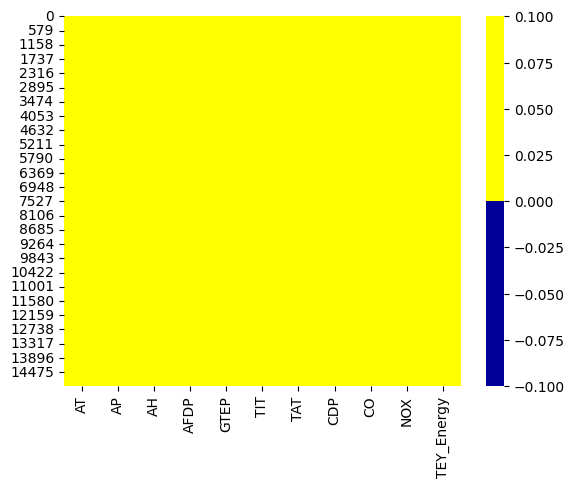

In [ ]:
colours = ['#000099', '#ffff00']
pal = sns.color_palette(colours)
sns.heatmap(data.isnull(), cmap=pal)
plt.show()

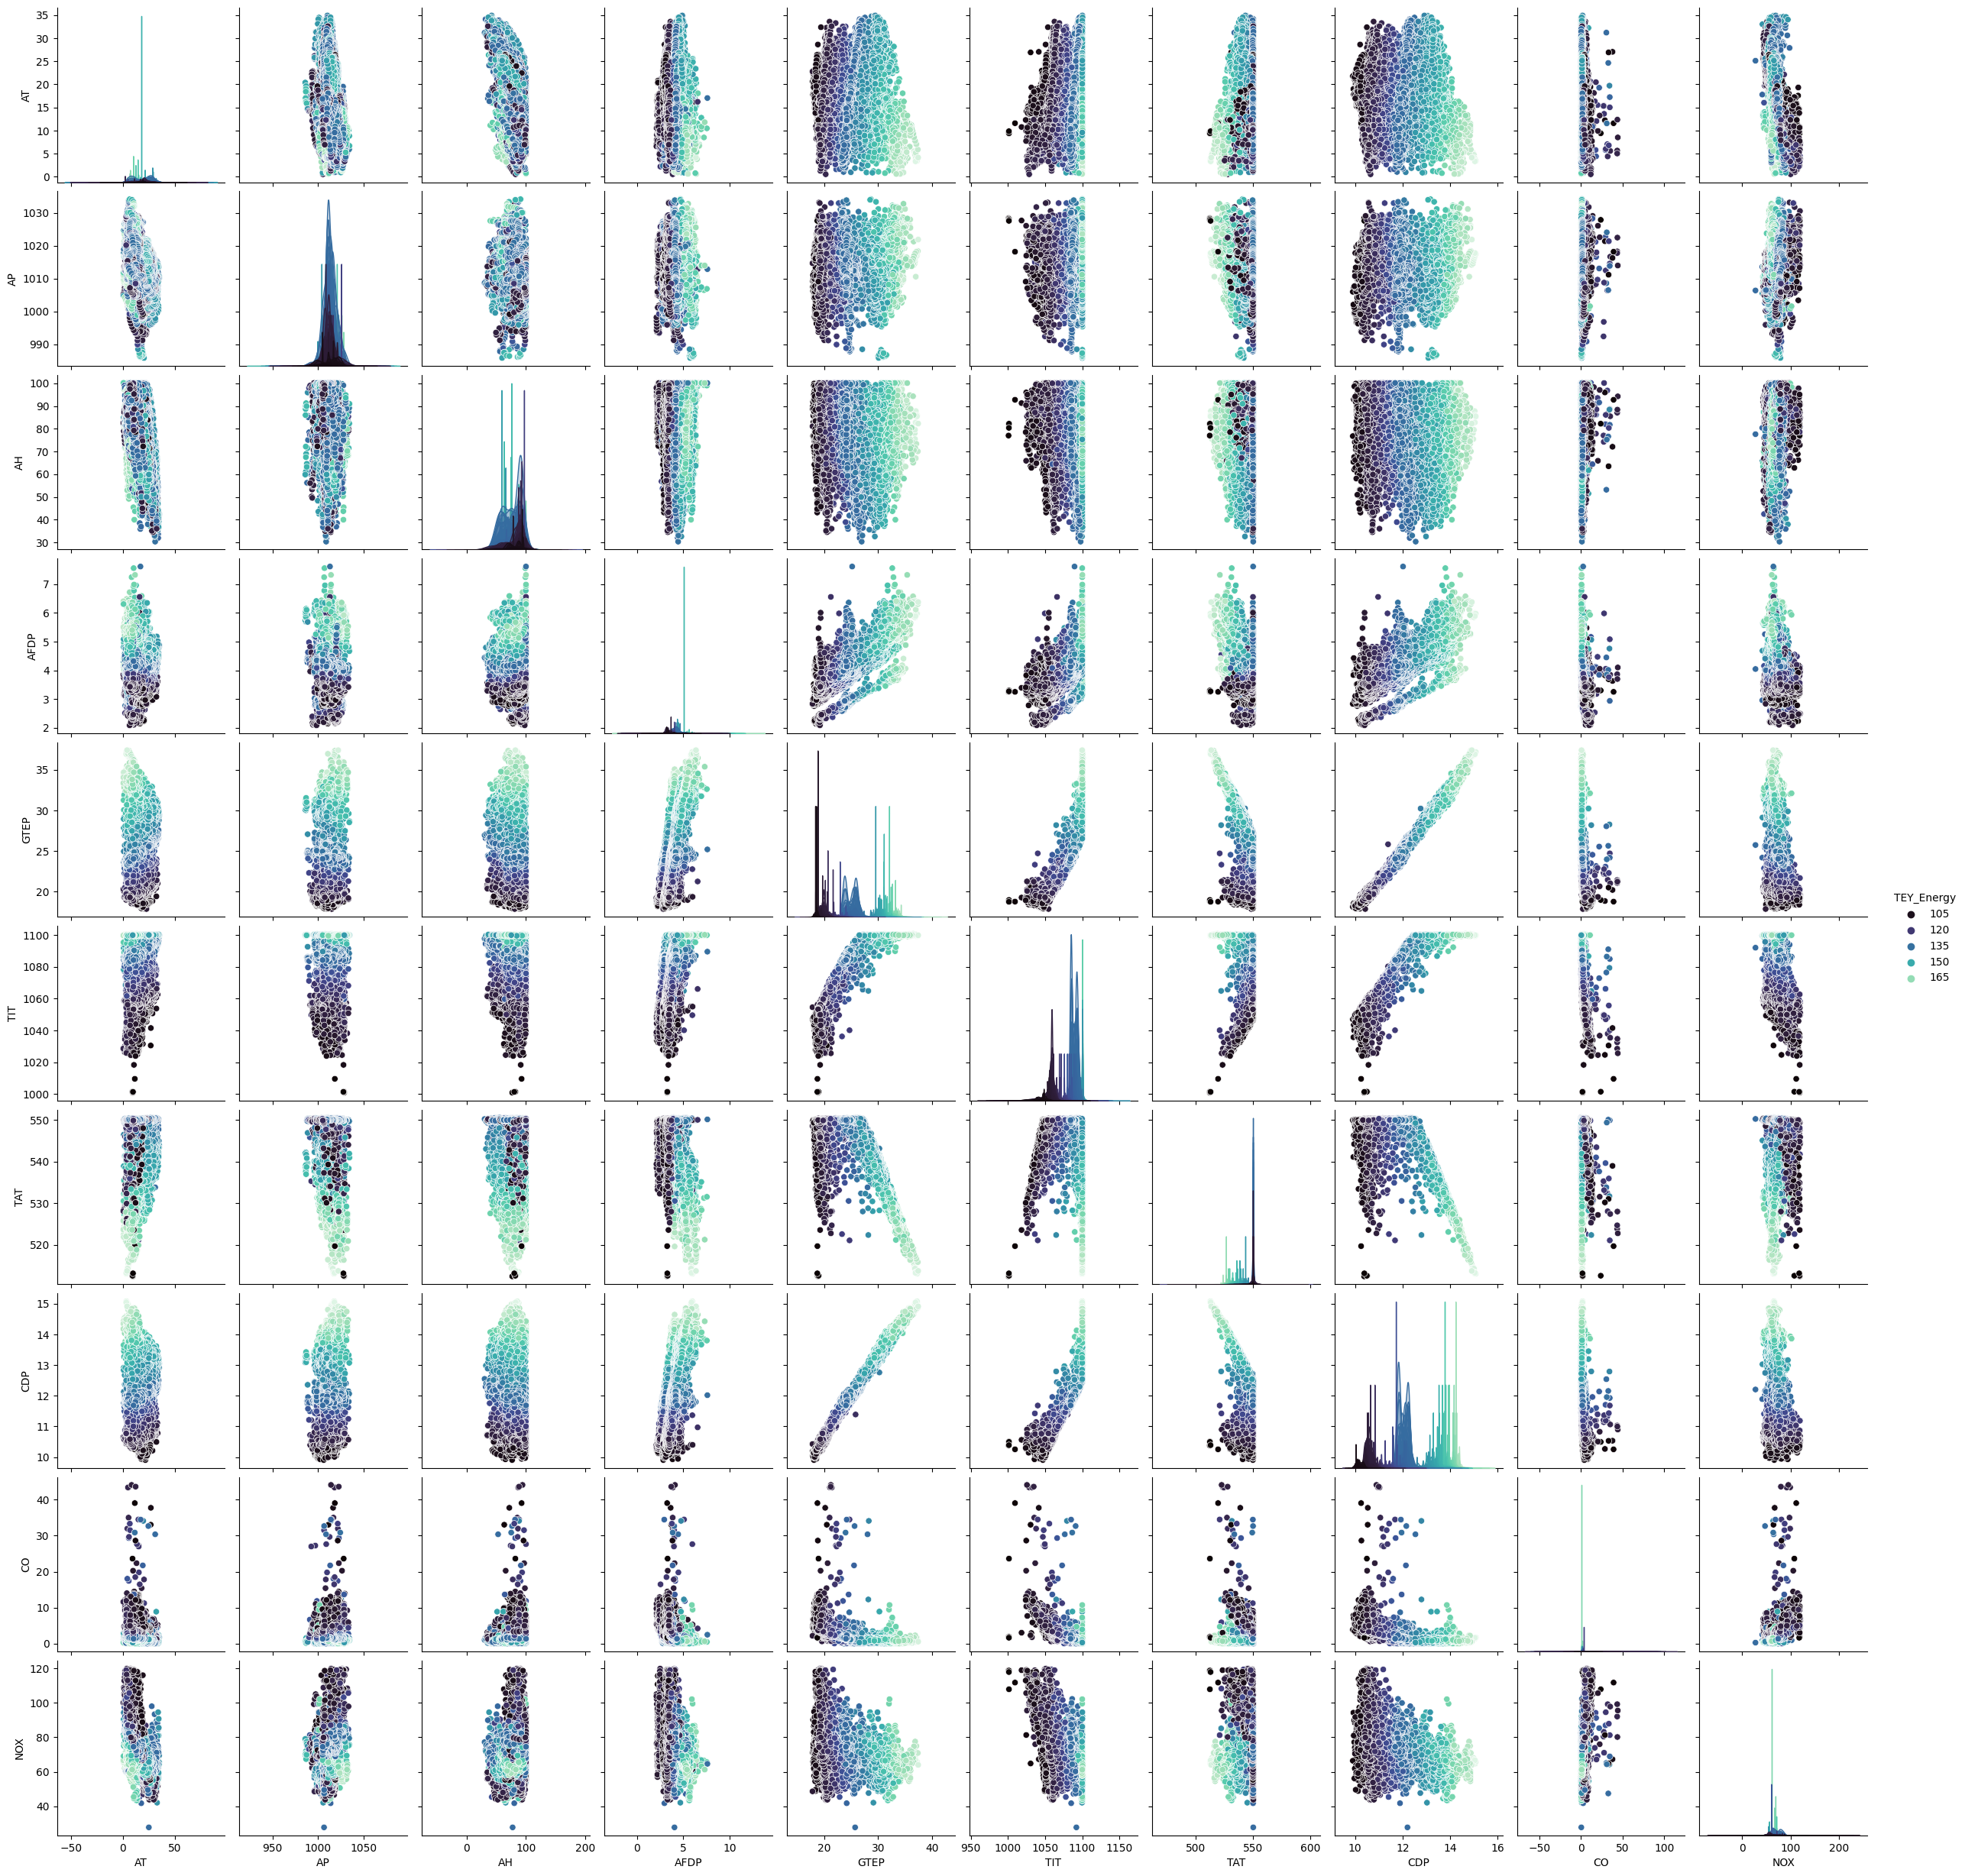

In [ ]:
sns.pairplot(data,palette='mako', hue='TEY_Energy')
plt.show()

In [ ]:
data.corr()

AT        AP        AH      AFDP      GTEP       TIT  \
AT          1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067   
AP         -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650   
AH         -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781   
AFDP       -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254   
GTEP       -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526   
TIT         0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000   
TAT         0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320   
CDP        -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238   
CO         -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272   
NOX        -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636   
TEY_Energy -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587   

                 TAT       CDP        CO       NOX  TEY_Energy  
AT          0.338569 -0.100705 -0.088588 -0.600006   -0.207495  
AP         -0.223479  0.131198  0.041614  0.256744    0.146939  
AH          0.010859 -0.182010  0.165505  0.143061   -0.110272  
AFDP       -0.571541  0.727152 -0.334207 -0.037299    0.717995  
GTEP       -0.756884  0.993784 -0.508259 -0.208496    0.977042  
TIT        -0.357320  0.887238 -0.688272 -0.231636    0.891587  
TAT         1.000000 -0.744740  0.063404  0.009888   -0.720356  
CDP        -0.744740  1.000000 -0.520783 -0.169103    0.988473  
CO          0.063404 -0.520783  1.000000  0.316743   -0.541751  
NOX         0.009888 -0.169103  0.316743  1.000000   -0.102631  
TEY_Energy -0.720356  0.988473 -0.541751 -0.102631    1.000000

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['AT'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['AP'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['AFDP'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['AT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['AP'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['AFDP'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['AT', 'AP'], ['AP', 'AH'], ['AH', 'AFDP'], ['AFDP', 'GTEP']]], **{})
chart

[]

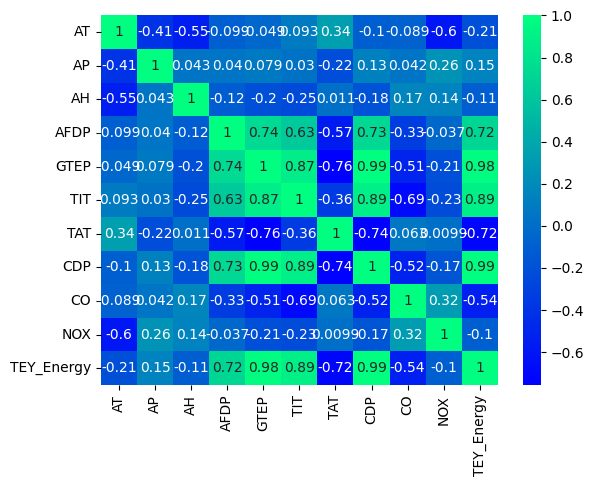

In [ ]:
sns.heatmap(data.corr(), cmap='winter', annot=True)
plt.plot()

In [ ]:
data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           CDP            CO           NOX  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183     12.102353      1.972499     68.190934   
std       16.527806      7.866803      1.103196      2.222206     10.470586   
min     1000.800000    512.450000      9.904400      0.000388     27.765000   
25%     1079.600000    542.170000     11.622000      0.858055     61.303500   
50%     1088.700000    549.890000     12.025000      1.390200     66.601000   
75%     1096.000000    550.060000     12.578000      2.160400     73.935500   
max     1100.800000    550.610000     15.081000     44.103000    119.890000   

         TEY_Energy  
count  15039.000000  
mean     134.188464  
std       15.829717  
min      100.170000  
25%      127.985000  
50%      133.780000  
75%      140.895000  
max      174.610000

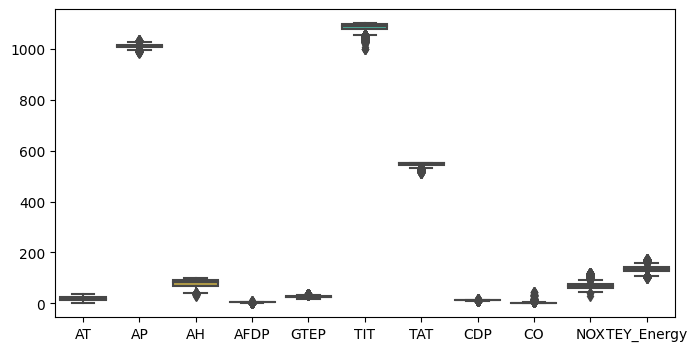

In [ ]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data)
plt.show()

In [ ]:
X=data.iloc[:,:10]
y=data.iloc[:,10]

In [ ]:
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [ ]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY_Energy, Length: 15039, dtype: float64

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(15,input_dim=10,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae','mse'])

In [ ]:
history=model.fit(X,y,validation_split=0.2,batch_size=250,epochs=500)

Epoch 1/500
49/49 [==============================] - 1s 10ms/step - loss: 18439.0781 - mae: 134.8714 - mse: 18439.0781 - val_loss: 17529.2852 - val_mae: 131.4570 - val_mse: 17529.2852
Epoch 2/500
49/49 [==============================] - 0s 4ms/step - loss: 18439.0781 - mae: 134.8714 - mse: 18439.0781 - val_loss: 17529.2852 - val_mae: 131.4570 - val_mse: 17529.2852
Epoch 3/500
49/49 [==============================] - 0s 4ms/step - loss: 18439.0781 - mae: 134.8714 - mse: 18439.0781 - val_loss: 17529.2852 - val_mae: 131.4570 - val_mse: 17529.2852
Epoch 4/500
49/49 [==============================] - 0s 4ms/step - loss: 18439.0801 - mae: 134.8714 - mse: 18439.0801 - val_loss: 17529.2852 - val_mae: 131.4570 - val_mse: 17529.2852
Epoch 5/500
49/49 [==============================] - 0s 4ms/step - loss: 18439.0742 - mae: 134.8714 - mse: 18439.0742 - val_loss: 17529.2852 - val_mae: 131.4570 - val_mse: 17529.2852
Epoch 6/500
49/49 [==============================] - 0s 4ms/step - loss: 18439.0781 

[]

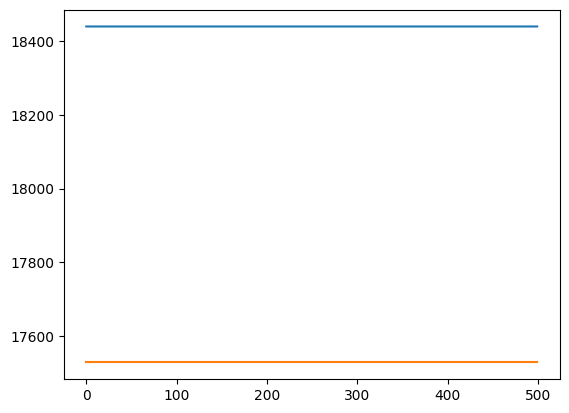

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.plot()

In [ ]:
result=model.evaluate(X,y)

470/470 [==============================] - 1s 2ms/step - loss: 18257.1094 - mae: 134.1884 - mse: 18257.1094


Tuning of Hyperparameters:

Batch Size and epochs

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_standardized=scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_standardized)

0         1         2         3         4      5         6  \
0      0.184182  0.456050  0.951314  0.255758  0.091426  0.584  0.984015   
1      0.182020  0.466391  0.955881  0.255721  0.094755  0.585  0.984015   
2      0.185295  0.474664  0.939003  0.252571  0.097367  0.586  0.980608   
3      0.189922  0.482937  0.929126  0.252227  0.098033  0.588  0.983753   
4      0.199830  0.493278  0.927708  0.255323  0.096650  0.589  0.983491   
...         ...       ...       ...       ...       ...    ...       ...   
15034  0.247272  0.408480  0.975092  0.263380  0.065868  0.489  0.884696   
15035  0.214075  0.414685  0.984153  0.256826  0.078672  0.455  0.806342   
15036  0.195962  0.422958  0.989922  0.251593  0.084614  0.369  0.651730   
15037  0.188443  0.433299  0.982936  0.246451  0.076777  0.424  0.754455   
15038  0.186173  0.441572  0.961821  0.242631  0.073141  0.491  0.875262   

              7         8         9  
0      0.135340  0.071522  0.596548  
1      0.133988  0.073372  0.597134  
2      0.134567  0.072576  0.593791  
3      0.135533  0.072375  0.595984  
4      0.136692  0.073647  0.592087  
...         ...       ...       ...  
15034  0.095739  0.102448  0.562214  
15035  0.102113  0.109894  0.566100  
15036  0.111772  0.180552  0.685449  
15037  0.121431  0.141693  0.710578  
15038  0.131090  0.112946  0.702665  

[15039 rows x 10 columns]

In [ ]:
!python --version

Python 3.10.12


In [ ]:
keras.__version__

'2.13.1'

In [ ]:
!pip install scikeras

In [ ]:
#Import the necessary Packages
import scikeras
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [ ]:
#Model
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=10,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
  return model

In [ ]:
#Model creating
model=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100] #Grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)#Build and fit GridsearchCV


In [ ]:
grid_result=grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-54.435 total time=  42.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-164.062 total time=  21.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-66.296 total time=  23.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-76.561 total time=  22.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-68.522 total time=  23.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ...batch_size=10, epochs=50;, score=-54.435 total time= 1.7min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ..batch_size=10, epochs=50;, score=-164.062 total time= 1.8min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ...batch_size=10, epochs=50;, score=-66.296 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ...batch_size=10, epochs=50;, score=-76.561 total time= 2.4min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ...batch_size=10, epochs=50;, score=-68.522 total time= 2.4min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ..batch_size=10, epochs=100;, score=-54.435 total time= 4.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END .batch_size=10, epochs=100;, score=-164.062 total time= 3.6min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ..batch_size=10, epochs=100;, score=-66.296 total time= 3.6min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ..batch_size=10, epochs=100;, score=-76.561 total time= 3.5min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ..batch_size=10, epochs=100;, score=-68.522 total time= 4.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ...batch_size=20, epochs=10;, score=-54.435 total time=  21.8s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-164.062 total time=  22.1s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-66.296 total time=  13.5s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-76.561 total time=  11.7s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-68.522 total time=  21.9s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ...batch_size=20, epochs=50;, score=-54.435 total time= 1.4min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-164.062 total time= 1.4min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ...batch_size=20, epochs=50;, score=-66.296 total time=  56.8s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ...batch_size=20, epochs=50;, score=-76.561 total time=  54.6s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ...batch_size=20, epochs=50;, score=-68.522 total time= 1.4min
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ..batch_size=20, epochs=100;, score=-54.435 total time= 2.4min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END .batch_size=20, epochs=100;, score=-164.062 total time= 2.4min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ..batch_size=20, epochs=100;, score=-66.296 total time= 2.4min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ..batch_size=20, epochs=100;, score=-76.561 total time= 2.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ..batch_size=20, epochs=100;, score=-68.522 total time= 1.8min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ...batch_size=40, epochs=10;, score=-54.435 total time=   6.5s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-164.062 total time=  11.7s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-66.296 total time=   7.4s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-76.561 total time=   5.9s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-68.522 total time=  11.4s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ...batch_size=40, epochs=50;, score=-54.435 total time=  42.1s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-164.062 total time=  42.3s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-66.296 total time=  42.5s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-76.561 total time=  27.3s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ...batch_size=40, epochs=50;, score=-68.522 total time=  42.1s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-54.435 total time=  54.3s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-164.062 total time= 1.4min
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ..batch_size=40, epochs=100;, score=-66.296 total time=  52.9s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ..batch_size=40, epochs=100;, score=-76.561 total time=  52.2s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ..batch_size=40, epochs=100;, score=-68.522 total time=  53.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
#Summarize the result
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))


Best:-85.97527050092489,using:{'batch_size': 20, 'epochs': 100}
-85.97527063031194,39.68087043505698 with: {'batch_size': 10, 'epochs': 10}
-85.97527050093125,39.68087037978735 with: {'batch_size': 10, 'epochs': 50}
-85.97527050093763,39.680870379784544 with: {'batch_size': 10, 'epochs': 100}
-85.97527915913028,39.68087895881531 with: {'batch_size': 20, 'epochs': 10}
-85.97527050093761,39.68087037978456 with: {'batch_size': 20, 'epochs': 50}
-85.97527050092489,39.68087037979014 with: {'batch_size': 20, 'epochs': 100}
-85.9753016780579,39.68086225950145 with: {'batch_size': 40, 'epochs': 10}
-85.97527054197937,39.680870378410226 with: {'batch_size': 40, 'epochs': 50}
-85.97527050094396,39.68087037978176 with: {'batch_size': 40, 'epochs': 100}


Learning Rate and Drop out Rate

In [ ]:
#Model
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(10,input_dim=10,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mse'])
  return model

In [ ]:
#Model creating
model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=40,epochs=10,dropout_rate=0.0,learning_rate=0.1)
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2] #Grid search parameters
param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)
grid1=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)#Build and fit GridsearchCV

In [ ]:
grid_result=grid1.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-54.435 total time=  11.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-164.062 total time=   7.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-66.296 total time=   6.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-76.561 total time=   7.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-68.522 total time=  12.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-54.435 total time=   6.3s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-164.062 total time=   7.5s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-66.296 total time=   6.4s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-76.561 total time=  11.3s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-68.522 total time=  11.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-54.435 total time=  13.5s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-164.062 total time=   6.2s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-66.296 total time=   7.8s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-76.561 total time=   6.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-68.522 total time=   7.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-54.435 total time=  11.5s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-164.062 total time=   6.4s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-66.296 total time=  11.6s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-76.561 total time=   8.2s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-68.522 total time=   6.4s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-54.435 total time=   7.9s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-164.062 total time=   6.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-66.296 total time=   7.7s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-76.561 total time=  11.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-68.522 total time=   6.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-54.435 total time=   9.9s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-164.062 total time=   7.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-66.296 total time=   6.9s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-76.561 total time=  11.6s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-68.522 total time=   6.6s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-54.435 total time=  12.0s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-164.062 total time=   7.9s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-66.296 total time=  11.5s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-76.561 total time=  11.5s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-68.522 total time=   6.6s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-54.435 total time=   8.0s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-164.062 total time=   6.3s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-66.296 total time=   8.9s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-76.561 total time=   6.5s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-68.522 total time=   7.6s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-54.435 total time=   7.0s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-164.062 total time=   8.0s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-66.296 total time=  11.5s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-76.561 total time=   6.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-68.522 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
#Summarize the result
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best:-85.97527050092489,using:{'dropout_rate': 0.0, 'learning_rate': 0.1}
-85.97530689426522,39.680864729848345 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-85.9752711698527,39.68087055026608 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-85.97527050092489,39.68087037979014 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-85.97527146730549,39.680870617059085 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-85.97527050094078,39.68087037978315 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-85.97527050092489,39.68087037979014 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-85.97527052351595,39.6808703918611 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-85.97527050092489,39.68087037979014 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-85.97527050092489,39.68087037979014 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
#Activation Function and Kernel Initializer
#Model
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(10,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mse'])
  return model



In [ ]:
#Model creating
model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=40,epochs=10,activation_function='softmax',init='uniform')
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero'] #Grid search parameters
param_grids=dict(activation_function=activation_function,init=init)
grid1=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)#Build and fit GridsearchCV
grid_result=grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-54.435 total time=  43.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-164.062 total time=  42.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-66.296 total time=  24.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-76.561 total time=  24.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-68.522 total time=  42.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ...batch_size=10, epochs=50;, score=-54.435 total time= 2.4min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ..batch_size=10, epochs=50;, score=-164.062 total time= 1.9min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ...batch_size=10, epochs=50;, score=-66.296 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ...batch_size=10, epochs=50;, score=-76.561 total time= 1.9min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ...batch_size=10, epochs=50;, score=-68.522 total time= 1.8min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ..batch_size=10, epochs=100;, score=-54.435 total time= 4.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END .batch_size=10, epochs=100;, score=-164.062 total time= 3.8min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ..batch_size=10, epochs=100;, score=-66.296 total time= 4.0min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ..batch_size=10, epochs=100;, score=-76.561 total time= 3.8min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ..batch_size=10, epochs=100;, score=-68.522 total time= 3.8min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ...batch_size=20, epochs=10;, score=-54.435 total time=  12.0s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-164.062 total time=  12.1s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-66.296 total time=  22.2s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-76.561 total time=  12.5s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-68.522 total time=  12.4s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ...batch_size=20, epochs=50;, score=-54.435 total time=  56.5s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-164.062 total time=  56.6s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ...batch_size=20, epochs=50;, score=-66.296 total time=  56.2s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ...batch_size=20, epochs=50;, score=-76.561 total time=  59.1s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ...batch_size=20, epochs=50;, score=-68.522 total time=  58.6s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ..batch_size=20, epochs=100;, score=-54.435 total time= 2.4min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END .batch_size=20, epochs=100;, score=-164.062 total time= 2.0min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ..batch_size=20, epochs=100;, score=-66.296 total time= 2.4min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ..batch_size=20, epochs=100;, score=-76.561 total time= 1.9min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ..batch_size=20, epochs=100;, score=-68.522 total time= 1.9min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ...batch_size=40, epochs=10;, score=-54.435 total time=  11.8s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-164.062 total time=   7.5s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-66.296 total time=   6.2s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-76.561 total time=  11.4s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-68.522 total time=   7.1s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ...batch_size=40, epochs=50;, score=-54.435 total time=  29.6s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-164.062 total time=  30.2s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-66.296 total time=  28.8s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-76.561 total time=  43.1s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ...batch_size=40, epochs=50;, score=-68.522 total time=  32.0s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-54.435 total time=  60.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-164.062 total time= 1.4min
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ..batch_size=40, epochs=100;, score=-66.296 total time=  59.4s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ..batch_size=40, epochs=100;, score=-76.561 total time= 1.4min
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ..batch_size=40, epochs=100;, score=-68.522 total time=  58.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
#Summarize the result
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best:-85.97527050093443,using:{'batch_size': 20, 'epochs': 100}
-85.97527061377897,39.680870410117336 with: {'batch_size': 10, 'epochs': 10}
-85.97527050093444,39.68087037978594 with: {'batch_size': 10, 'epochs': 50}
-85.97527050093763,39.680870379784544 with: {'batch_size': 10, 'epochs': 100}
-85.97527366316294,39.6808713085348 with: {'batch_size': 20, 'epochs': 10}
-85.97527050093761,39.68087037978456 with: {'batch_size': 20, 'epochs': 50}
-85.97527050093443,39.68087037978595 with: {'batch_size': 20, 'epochs': 100}
-85.97529296277739,39.68087046228975 with: {'batch_size': 40, 'epochs': 10}
-85.97527052865222,39.68087039020685 with: {'batch_size': 40, 'epochs': 50}
-85.97527050094024,39.68087037978245 with: {'batch_size': 40, 'epochs': 100}


Number of Neurons in activation layer

In [ ]:
#Model
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(lr=0.001)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mse'])
  return model

In [ ]:
#Model creating
model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=40,epochs=10,neuron1=4,neuron2=2)
neuron1=[4,8,16]
neuron2=[2,4,8] #Grid search parameters
param_grids=dict(neuron1=neuron1,neuron2=neuron2)
grid1=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)#Build and fit GridsearchCV
grid_result=grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END ...batch_size=10, epochs=10;, score=-54.435 total time=  23.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-164.062 total time=  24.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END ...batch_size=10, epochs=10;, score=-66.296 total time=  24.1s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END ...batch_size=10, epochs=10;, score=-76.561 total time=  32.1s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END ...batch_size=10, epochs=10;, score=-68.522 total time=  43.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ...batch_size=10, epochs=50;, score=-54.435 total time= 2.1min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ..batch_size=10, epochs=50;, score=-164.062 total time= 2.4min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ...batch_size=10, epochs=50;, score=-66.296 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ...batch_size=10, epochs=50;, score=-76.561 total time= 2.4min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ...batch_size=10, epochs=50;, score=-68.522 total time= 1.8min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ..batch_size=10, epochs=100;, score=-54.435 total time= 4.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END .batch_size=10, epochs=100;, score=-164.062 total time= 3.7min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ..batch_size=10, epochs=100;, score=-66.296 total time= 4.4min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ..batch_size=10, epochs=100;, score=-76.561 total time= 3.7min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ..batch_size=10, epochs=100;, score=-68.522 total time= 4.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END ...batch_size=20, epochs=10;, score=-54.435 total time=  21.9s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END ..batch_size=20, epochs=10;, score=-164.062 total time=  22.0s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END ...batch_size=20, epochs=10;, score=-66.296 total time=  21.9s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END ...batch_size=20, epochs=10;, score=-76.561 total time=  21.8s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END ...batch_size=20, epochs=10;, score=-68.522 total time=  21.9s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ...batch_size=20, epochs=50;, score=-54.435 total time= 1.4min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ..batch_size=20, epochs=50;, score=-164.062 total time= 1.0min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ...batch_size=20, epochs=50;, score=-66.296 total time= 1.4min
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ...batch_size=20, epochs=50;, score=-76.561 total time=  55.9s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ...batch_size=20, epochs=50;, score=-68.522 total time= 1.4min
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ..batch_size=20, epochs=100;, score=-54.435 total time= 1.9min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END .batch_size=20, epochs=100;, score=-164.062 total time= 2.4min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ..batch_size=20, epochs=100;, score=-66.296 total time= 2.4min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ..batch_size=20, epochs=100;, score=-76.561 total time= 2.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ..batch_size=20, epochs=100;, score=-68.522 total time= 1.9min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END ...batch_size=40, epochs=10;, score=-54.435 total time=  11.4s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END ..batch_size=40, epochs=10;, score=-164.062 total time=   6.3s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END ...batch_size=40, epochs=10;, score=-66.296 total time=  11.6s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END ...batch_size=40, epochs=10;, score=-76.561 total time=   9.0s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END ...batch_size=40, epochs=10;, score=-68.522 total time=   6.3s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ...batch_size=40, epochs=50;, score=-54.435 total time=  42.4s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ..batch_size=40, epochs=50;, score=-164.062 total time=  42.6s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ...batch_size=40, epochs=50;, score=-66.296 total time=  42.1s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ...batch_size=40, epochs=50;, score=-76.561 total time=  29.7s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ...batch_size=40, epochs=50;, score=-68.522 total time=  29.2s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ..batch_size=40, epochs=100;, score=-54.435 total time= 1.4min
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END .batch_size=40, epochs=100;, score=-164.062 total time=  58.1s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ..batch_size=40, epochs=100;, score=-66.296 total time= 1.4min
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ..batch_size=40, epochs=100;, score=-76.561 total time= 1.4min
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ..batch_size=40, epochs=100;, score=-68.522 total time=  59.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
#Summarize the result
print('Best:{},using:{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best:-85.97527050093125,using:{'batch_size': 10, 'epochs': 50}
-85.9752707049735,39.68087038000897 with: {'batch_size': 10, 'epochs': 10}
-85.97527050093125,39.68087037978735 with: {'batch_size': 10, 'epochs': 50}
-85.97527050093443,39.68087037978595 with: {'batch_size': 10, 'epochs': 100}
-85.97527490361581,39.680873909035185 with: {'batch_size': 20, 'epochs': 10}
-85.97527050093763,39.680870379784544 with: {'batch_size': 20, 'epochs': 50}
-85.97527050093763,39.680870379784544 with: {'batch_size': 20, 'epochs': 100}
-85.97531293298012,39.680887120523394 with: {'batch_size': 40, 'epochs': 10}
-85.97527051779414,39.68087038226142 with: {'batch_size': 40, 'epochs': 50}
-85.97527050093443,39.68087037978595 with: {'batch_size': 40, 'epochs': 100}


Training model with optimum value of Hyperparameters

In [ ]:
#Model
def create_model(learning_rate,dropout_rate,activation_function,kernel_initializer,neuron1,neuron2):
  model=Sequential()
  model.add(Dense(16,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(4,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mse'])
  return model
  model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=10,epochs=100,dropout_rate=0.1,learning_rate=0.001,activation_function='linear',kernel_initializer='uniform',neuron1=16,neuron2=8)
  model.fit(X_standardized,y)




In [ ]:
y_predict=model.predict(X_standardized)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y,y_predict)
mse=mean_squared_error(y,y_predict)
print('Regression Metrics:')
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)

470/470 [==============================] - 1s 3ms/step
Regression Metrics:
Mean Absolute Error: 133.18846399361658
Mean Squared Error: 17989.730228878252


In [ ]:
new_data=pd.DataFrame({'AT':5.4132,'AP':1000,'AH':95.500,'AFDP':2.000,'GTEP':17.94,'TIT':1000,'TAT':548,'CDP':7.000,'CO':3.0,'NOX':80},index=[1])

In [ ]:
new_data

AT    AP    AH  AFDP   GTEP   TIT  TAT  CDP   CO  NOX
1  5.4132  1000  95.5   2.0  17.94  1000  548  7.0  3.0   80

In [ ]:
model.predict(new_data)

1/1 [==============================] - 0s 82ms/step


array([[1.]], dtype=float32)

In [ ]:
prediction = model.predict(new_data)
predicted_value = prediction[0][0]
print("Predicted Value:", predicted_value)

1/1 [==============================] - 0s 41ms/step
Predicted Value: 1.0
